# 第五週建議作業

* 參考 AIMA 圖 5.2，採用 minimax 演算法，以下的 game tree 中，最上層的 MAX 該走左側選項或者右側選項，為什麼？
  - ![game tree](./game.tree.jpg)

按照這棵 game tree，回溯計算評分結果為：**(紅為 MAX，藍為 MIN)**

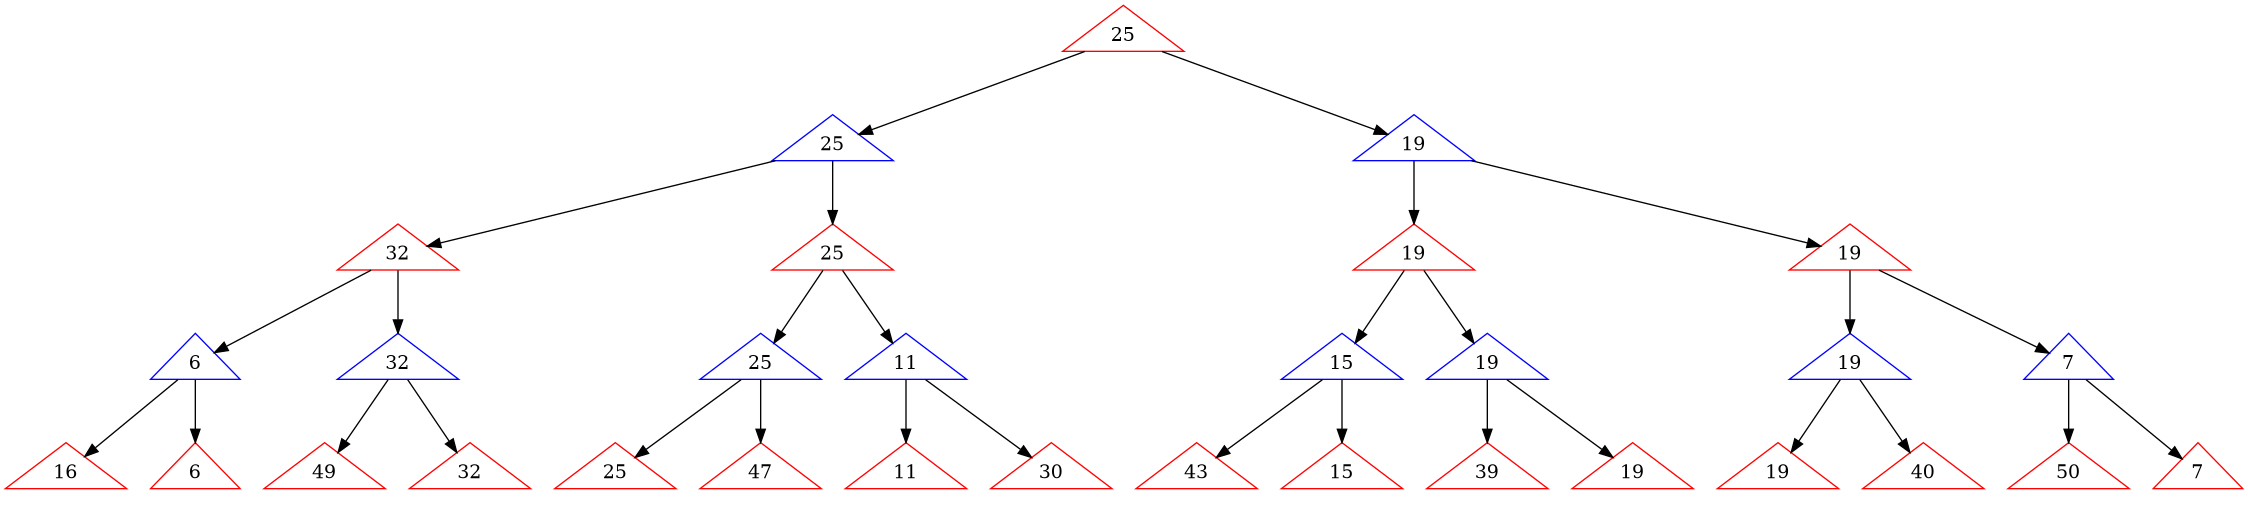

In [11]:
digraph {
    a00[shape=triangle, label="25", color=red]
    
    b00[shape=triangle, label="25", color=blue]
    b01[shape=triangle, label="19", color=blue]
    
    a00->b00
    a00->b01

    a10[shape=triangle, label="32", color=red]
    a11[shape=triangle, label="25", color=red]
    a12[shape=triangle, label="19", color=red]
    a13[shape=triangle, label="19", color=red]
    
    b00->a10
    b00->a11
    b01->a12
    b01->a13
    
    b10[shape=triangle, label="6", color=blue]
    b11[shape=triangle, label="32", color=blue]
    b12[shape=triangle, label="25", color=blue]
    b13[shape=triangle, label="11", color=blue]
    b14[shape=triangle, label="15", color=blue]
    b15[shape=triangle, label="19", color=blue]
    b16[shape=triangle, label="19", color=blue]
    b17[shape=triangle, label="7", color=blue]

    a10->b10
    a10->b11
    a11->b12
    a11->b13
    a12->b14
    a12->b15
    a13->b16
    a13->b17
    
    a20[shape=triangle, label="16", color=red]
    a21[shape=triangle, label="6", color=red]
    a22[shape=triangle, label="49", color=red]
    a23[shape=triangle, label="32", color=red]
    a24[shape=triangle, label="25", color=red]
    a25[shape=triangle, label="47", color=red]
    a26[shape=triangle, label="11", color=red]
    a27[shape=triangle, label="30", color=red]
    a28[shape=triangle, label="43", color=red]
    a29[shape=triangle, label="15", color=red]
    a2A[shape=triangle, label="39", color=red]
    a2B[shape=triangle, label="19", color=red]
    a2C[shape=triangle, label="19", color=red]
    a2D[shape=triangle, label="40", color=red]
    a2E[shape=triangle, label="50", color=red]
    a2F[shape=triangle, label="7", color=red]
    
    b10->a20
    b10->a21
    b11->a22
    b11->a23
    b12->a24
    b12->a25
    b13->a26
    b13->a27
    b14->a28
    b14->a29
    b15->a2A
    b15->a2B
    b16->a2C
    b16->a2D
    b17->a2E
    b17->a2F
}


並得整個的決策路線如下：

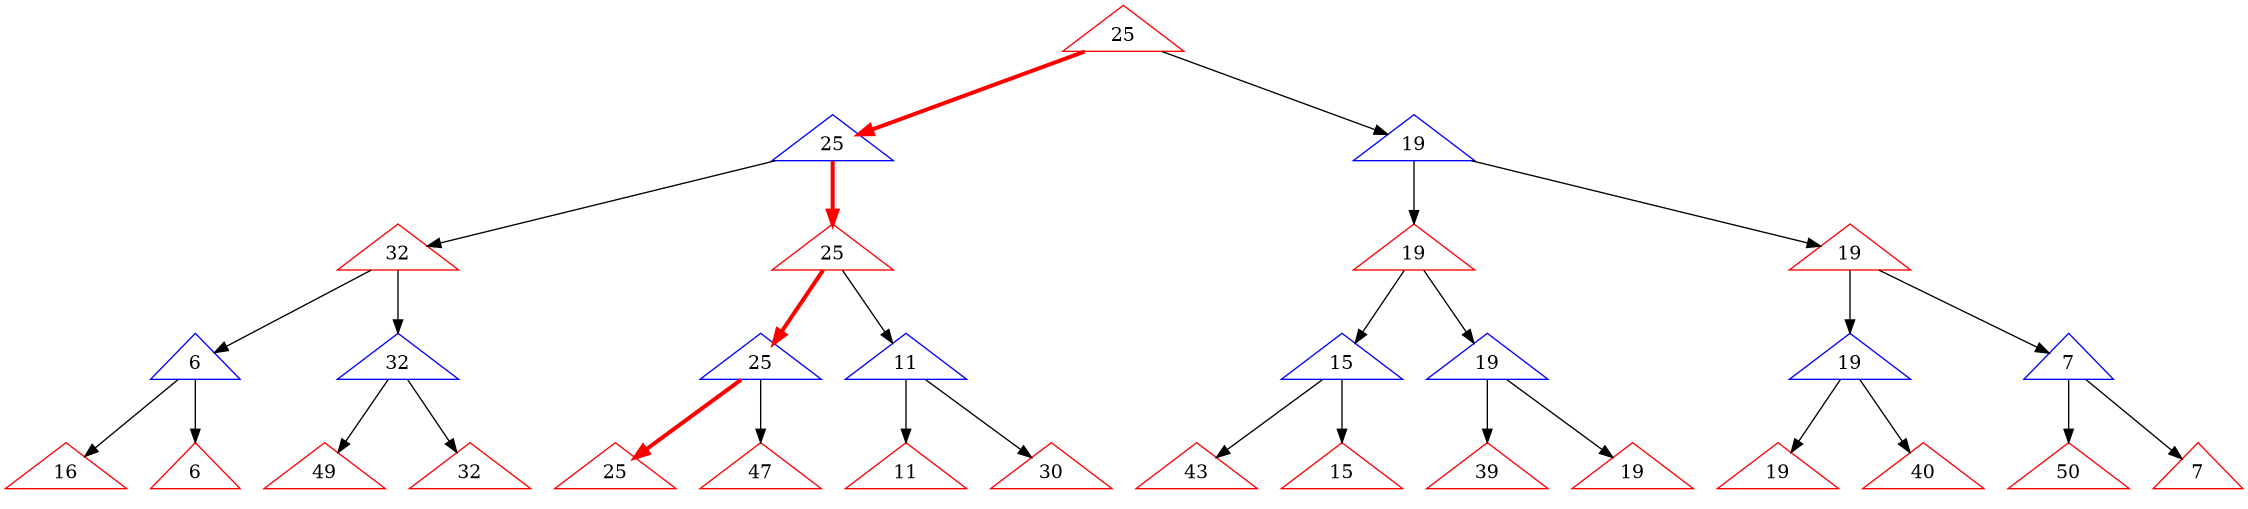

In [ ]:
digraph {
    a00[shape=triangle, label="25", color=red]
    
    b00[shape=triangle, label="25", color=blue]
    b01[shape=triangle, label="19", color=blue]
    
    a00->b00[color=red, penwidth=3.0]
    a00->b01

    a10[shape=triangle, label="32", color=red]
    a11[shape=triangle, label="25", color=red]
    a12[shape=triangle, label="19", color=red]
    a13[shape=triangle, label="19", color=red]
    
    b00->a10
    b00->a11[color=red, penwidth=3.0]
    b01->a12
    b01->a13
    
    b10[shape=triangle, label="6", color=blue]
    b11[shape=triangle, label="32", color=blue]
    b12[shape=triangle, label="25", color=blue]
    b13[shape=triangle, label="11", color=blue]
    b14[shape=triangle, label="15", color=blue]
    b15[shape=triangle, label="19", color=blue]
    b16[shape=triangle, label="19", color=blue]
    b17[shape=triangle, label="7", color=blue]

    a10->b10
    a10->b11
    a11->b12[color=red, penwidth=3.0]
    a11->b13
    a12->b14
    a12->b15
    a13->b16
    a13->b17
    
    a20[shape=triangle, label="16", color=red]
    a21[shape=triangle, label="6", color=red]
    a22[shape=triangle, label="49", color=red]
    a23[shape=triangle, label="32", color=red]
    a24[shape=triangle, label="25", color=red]
    a25[shape=triangle, label="47", color=red]
    a26[shape=triangle, label="11", color=red]
    a27[shape=triangle, label="30", color=red]
    a28[shape=triangle, label="43", color=red]
    a29[shape=triangle, label="15", color=red]
    a2A[shape=triangle, label="39", color=red]
    a2B[shape=triangle, label="19", color=red]
    a2C[shape=triangle, label="19", color=red]
    a2D[shape=triangle, label="40", color=red]
    a2E[shape=triangle, label="50", color=red]
    a2F[shape=triangle, label="7", color=red]
    
    b10->a20
    b10->a21
    b11->a22
    b11->a23
    b12->a24[color=red, penwidth=3.0]
    b12->a25
    b13->a26
    b13->a27
    b14->a28
    b14->a29
    b15->a2A
    b15->a2B
    b16->a2C
    b16->a2D
    b17->a2E
    b17->a2F
}

因此，最上層的應該是走左邊那條路。因為回溯到第二層的分數時，左邊的 25 > 右邊的 19，而第一步棋，應當選擇 MAX 來走。

* 參考 Neapolitan.GA.pdf Table 9.4，搭配 order.crossover.pdf 的說明，決定下列以 GA 處理 TSP 問題時，所產生的子代基因序列。以紅色直線代表一號切點，藍色直線代表二號切點。
  - 問題一
    * 1 2 <b style="color:red;">|</b> 3 4 5 6 <b style="color:blue;">|</b> 7 8 9
    * 1 3 <b style="color:red;">|</b> 5 7 9 2 <b style="color:blue;">|</b> 4 6 8

In [2]:
splitList :: Int -> Int -> [Int] -> ([Int], [Int], [Int])
splitList c1 c2 lst
  | c1 < c2 = split c1 c2 lst
  | otherwise = split c2 c1 lst
  where split left right lst = let (l1, lo) = splitAt left lst
                                   (l2, l3) = splitAt (right - left) lo
                               in (l1, l2, l3)

filterList :: [Int] -> [Int] -> [Int]
filterList fix [] = []
filterList fix (x:xs)
  | x `elem` fix = filterList fix xs
  | otherwise = x:filterList fix xs


salesmanGaMid :: Int -> Int -> [Int] -> [Int] -> ([Int], [Int])
salesmanGaMid c1 c2 l1 l2 =
  let (_, l1Mid, _) = splitList c1 c2 l1
      (_, l2Mid, _) = splitList c1 c2 l2
      filteredL1 = filterList l2Mid l1
      filteredL2 = filterList l1Mid l2
      (filteredL1Left, filteredL1Right) = splitAt c1 filteredL1
      (filteredL2Left, filteredL2Right) = splitAt c1 filteredL2
  in (filteredL2Left ++ l1Mid ++ filteredL2Right,
      filteredL1Left ++ l2Mid ++ filteredL1Right)


salesmanGaSide :: Int -> Int -> [Int] -> [Int] -> ([Int], [Int])
salesmanGaSide c1 c2 l1 l2 =
  let (l1Left, _, l1Right) = splitList c1 c2 l1
      (l2Left, _, l2Right) = splitList c1 c2 l2
      filteredL1 = filterList (l2Left ++ l2Right) l1
      filteredL2 = filterList (l1Left ++ l1Right) l2
  in (l1Left ++ filteredL2 ++ l1Right, l2Left ++ filteredL1 ++ l2Right)

salesmanGa :: Int -> Int -> [Int] -> [Int] -> ([Int], [Int])
salesmanGa c1 c2 l1 l2
  | c1 < c2 = salesmanGaMid c1 c2 l1 l2
  | c1 > c2 = salesmanGaSide c1 c2 l1 l2

In [5]:
-- 第一小題

l1 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
l2 = [1, 3, 5, 7, 9, 2, 4, 6, 8]

salesmanGa 2 6 l1 l2

([1,7,3,4,5,6,9,2,8],[1,3,5,7,9,2,4,6,8])

由上述執行結果可知，本次的 GA 演算執行完後，結果是：

* 1 7 3 4 5 6 9 2 8
* 1 3 5 7 9 2 4 6 8

* (續上題)
  - 問題二 (更正版題目，原本的題目誤植了兩個5)
    * 1 2 <b style="color:blue;">|</b> 3 4 5 6 7 <b style="color:red;">|</b> 8 9
    * 1 3 <b style="color:blue;">|</b> 5 7 9 2 4 <b style="color:red;">|</b> 6 8

In [6]:
-- 第二小題

l1 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
l2 = [1, 3, 5, 7, 9, 2, 4, 6, 8]

salesmanGa 7 2 l1 l2

([1,2,3,5,7,4,6,8,9],[1,3,2,4,5,7,9,6,8])

由上述執行結果可知，本次的 GA 演算執行完後，結果是：

* 1 2 3 5 7 4 6 8 9
* 1 3 2 4 5 7 9 6 8

* 延用上課時所建立的 simulated.annealing.xlsx 檔案，驗證 simulated annealing 演算法，從比較好的節點走向比較差的節點的機率有如下的特點
  - 在 T 固定的時候，隨著 ΔE 的變小而變小
  - 在 ΔE 固定的時候，隨著 T 的變小而變小

In [3]:
simAnneal :: Float -> Float -> Float
simAnneal t dE = exp $ dE / t

In [6]:
t = 16
dEs = [-0.3, -0.8, -10]

probTs = map (simAnneal t) dEs
probTs

[0.9814247,0.95122945,0.53526145]

In [7]:
tt = 8
probTTs = map (simAnneal tt) dEs
probTTs

[0.96319443,0.9048374,0.2865048]

由上述程式結果可看出以下趨勢：

 T\ΔE | -0.3 | -0.8 | -10
 ---- | ---- | ---- | ----
 16 | 0.9814247 | 0.95122945 | 0.53526145
 8 | 0.96319443 | 0.9048374 | 0.2865048
 
而 Probility 計算公式為：

$$
{\rm e}^{\Delta E / T}
$$
 
當 T 固定時，ΔE 越小，則降溫機率越小
當 ΔE 固定時，T 越小，則降溫機率越小